# [Advent of Code 2019: Day 3](https://adventofcode.com/2019/day/3)

<h2>--- Day 3: Crossed Wires ---</h2><p>The gravity assist was successful, and you're well on your way to the Venus refuelling station.  During the rush back on Earth, the fuel management system wasn't completely installed, so that's next on the priority list.</p>
<p>Opening the front panel reveals a jumble of wires. Specifically, <em>two wires</em> are connected to a central port and extend outward on a grid.  You trace the path each wire takes as it leaves the central port, one wire per line of text (your puzzle input).</p>
<p>The wires <span title="A jumble of twisty little wires, all alike.">twist and turn</span>, but the two wires occasionally cross paths. To fix the circuit, you need to <em>find the intersection point closest to the central port</em>. Because the wires are on a grid, use the <a href="https://en.wikipedia.org/wiki/Taxicab_geometry">Manhattan distance</a> for this measurement. While the wires do technically cross right at the central port where they both start, this point does not count, nor does a wire count as crossing with itself.</p>
<p>For example, if the first wire's path is <code>R8,U5,L5,D3</code>, then starting from the central port (<code>o</code>), it goes right <code>8</code>, up <code>5</code>, left <code>5</code>, and finally down <code>3</code>:</p>
<pre><code>...........
...........
...........
....+----+.
....|....|.
....|....|.
....|....|.
.........|.
.o-------+.
...........
</code></pre>
<p>Then, if the second wire's path is <code>U7,R6,D4,L4</code>, it goes up <code>7</code>, right <code>6</code>, down <code>4</code>, and left <code>4</code>:</p>
<pre><code>...........
.+-----+...
.|.....|...
.|..+--X-+.
.|..|..|.|.
.|.-<em>X</em>--+.|.
.|..|....|.
.|.......|.
.o-------+.
...........
</code></pre>
<p>These wires cross at two locations (marked <code>X</code>), but the lower-left one is closer to the central port: its distance is <code>3 + 3 = 6</code>.</p>
<p>Here are a few more examples:</p>
<ul>
<li><code>R75,D30,R83,U83,L12,D49,R71,U7,L72<br>U62,R66,U55,R34,D71,R55,D58,R83</code> = distance <code>159</code></li>
<li><code>R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51<br>U98,R91,D20,R16,D67,R40,U7,R15,U6,R7</code> = distance <code>135</code></li>
</ul>
<p><em>What is the Manhattan distance</em> from the central port to the closest intersection?</p>


...
----------------------------------------------------------------------
Ran 3 tests in 0.112s

OK


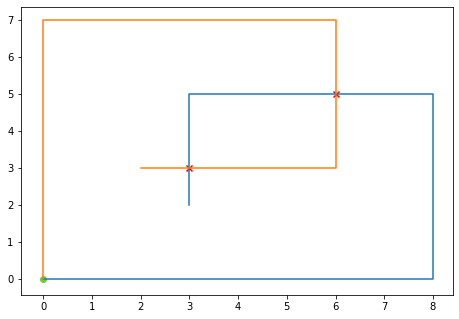

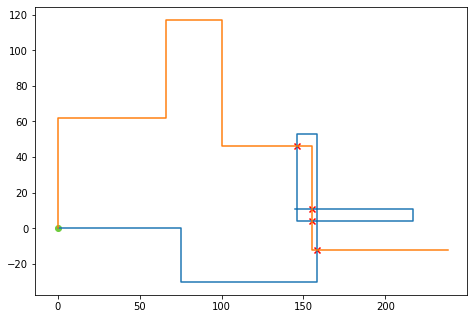

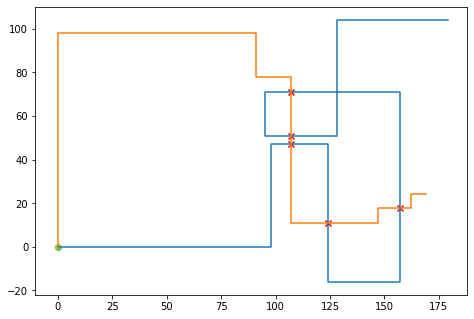

In [2]:
import os
import unittest
from matplotlib import pyplot as plt

class FuelManagmentSystem():
    
    CPORT = 'o'
    EMPTY = '.'
    VWIRE = '|'
    HWIRE = '-'
    CORNER = '+'
    INTERSECTION = 'X'
    
    DIR_UP = "U"
    DIR_DOWN = "D"
    DIR_LEFT = "L"
    DIR_RIGHT = "R"
    
    cport_coord = (0,0)
    
    def __init__(self, wire_paths = None):
        if wire_paths:
            self.load_paths(wire_paths)
            
    def normalize_paths(self, wire_paths):
        if type(wire_paths) is str:
            return self.normalize_paths(wire_paths.split('\n'))

        elif type(wire_paths) is list:
            if type(wire_paths[0]) is str:
                new_wire_paths = []
                for path in wire_paths:
                    new_wire_paths.append(path.split(','))
                return new_wire_paths
            else:
                return wire_paths

        else:
            raise Exception('Corrupt paths')
            
    def parse_path_part(self, path_part):
        direction = path_part[0]
        distance = int(path_part[1:])
        return (direction, distance)
    
    def add_pos_to_grid(self, pos):
        if pos in self.system_grid and not self.cport_coord:
            self.intersections.append(pos)
        else:
            self.system_grid.append(pos)
            
    def load_paths(self, wire_paths):
        """ Parses a comma seperated list of path parts ands points to a x, y coordinante grid. 
            If a coordinate already exists and in not the central port, assume it is an intersection.
        """
        
        wire_paths = self.normalize_paths(wire_paths)
        
        self.system_grid = []
        
        for path in wire_paths:
            pos = self.cport_coord
            wire_coords = []
            wire_coords.append(self.cport_coord)
            for path_part in path:
                
                dir, dist = self.parse_path_part(path_part)
                dist += 1
                x, y = pos
                
                if dir is self.DIR_UP:
                    for newy in range(y + 1, y + dist, 1):
                        pos = (x, newy)
                        wire_coords.append(pos)

                elif dir is self.DIR_DOWN:
                    for newy in range(y - 1, y - dist, -1):
                        pos = (x, newy)
                        wire_coords.append(pos)

                elif dir is self.DIR_RIGHT:
                    for newx in range(x + 1, x + dist, 1):
                        pos = (newx, y)
                        wire_coords.append(pos)

                elif dir is self.DIR_LEFT:
                    for newx in range(x - 1, x - dist, -1):
                        pos = (newx, y)
                        wire_coords.append(pos)
                        
                else:
                    raise Exception(f'Unkown direction: {adir}')
            
            self.system_grid.append(wire_coords)
    
    def get_intersections(self):
        return set(self.system_grid[0][1:]) & set(self.system_grid[1][1:])
    
    def get_intersec_dist_closest_to_cport(self):
        intersec_dist_list = []
        for x, y in self.get_intersections():
            intersec_dist_list.append(abs(x)+abs(y))
        return min(intersec_dist_list)
    
    def get_intersec_shortest_dist(self):
        intersec_dist_list = []
        for pos in self.get_intersections():
            intsec_dist_total = 0
            for path in self.system_grid:
                intsec_index = path.index(pos)
                intsec_dist_total += intsec_index
            intersec_dist_list.append(intsec_dist_total)
        return min(intersec_dist_list)
    
    def plot_system(self):
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        
        for path in self.system_grid:
            x, y = list(zip(*path))
            ax.plot(x,y)
            
        x, y = self.cport_coord
        plt.scatter(x, y, c='xkcd:apple', marker="o")
        
        for x, y in self.get_intersections():
            plt.scatter(x, y, c='red', marker="x")

class TestBasic(unittest.TestCase):
    
    def test_parse_path_part(self):
        data = [("R7",("R",7)),
                ("D30",("D",30)),
                ("L833",("L",833)),
                ("U3456",("U",3456))]
        fms = FuelManagmentSystem()
        for path_part, ans in data:
            self.assertEqual( ans , fms.parse_path_part(path_part) )
    
    def test_fms_intersec_distance(self):
        data = [("R8,U5,L5,D3\nU7,R6,D4,L4",6),
                ("R75,D30,R83,U83,L12,D49,R71,U7,L72\nU62,R66,U55,R34,D71,R55,D58,R83",159),
                ("R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51\nU98,R91,D20,R16,D67,R40,U7,R15,U6,R7",135)]
        fms = FuelManagmentSystem()
        for paths, ans in data:
            fms.load_paths(paths)
            self.assertEqual( ans , fms.get_intersec_dist_closest_to_cport() )
            
    def test_fms_intersec_shortest_dist(self):
        data = [("R8,U5,L5,D3\nU7,R6,D4,L4",30),
                ("R75,D30,R83,U83,L12,D49,R71,U7,L72\nU62,R66,U55,R34,D71,R55,D58,R83",610),
                ("R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51\nU98,R91,D20,R16,D67,R40,U7,R15,U6,R7",410)]
        fms = FuelManagmentSystem()
        for paths, ans in data:
            fms.load_paths(paths)
            fms.plot_system()
            self.assertEqual( ans , fms.get_intersec_shortest_dist() )
        
        
unittest.main(argv=[""], exit=False)


Data loaded

The closest intersection has a Manhattan distance of: 273


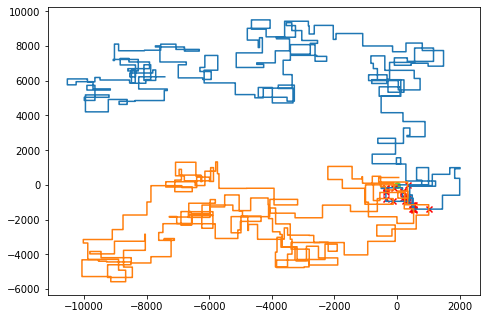

In [3]:
with open("inputs/input_d03.txt") as file:
    data = file.read()
    
fms = FuelManagmentSystem(data)
print("Data loaded")
fms.plot_system()
print()
print(f'The closest intersection has a Manhattan distance of: {fms.get_intersec_dist_closest_to_cport()}')


<h2 id="part2">--- Part Two ---</h2><p>It turns out that this circuit is very timing-sensitive; you actually need to <em>minimize the signal delay</em>.</p>
<p>To do this, calculate the <em>number of steps</em> each wire takes to reach each intersection; choose the intersection where the <em>sum of both wires' steps</em> is lowest. If a wire visits a position on the grid multiple times, use the steps value from the <em>first</em> time it visits that position when calculating the total value of a specific intersection.</p>
<p>The number of steps a wire takes is the total number of grid squares the wire has entered to get to that location, including the intersection being considered. Again consider the example from above:</p>
<pre><code>...........
.+-----+...
.|.....|...
.|..+--X-+.
.|..|..|.|.
.|.-X--+.|.
.|..|....|.
.|.......|.
.o-------+.
...........
</code></pre>
<p>In the above example, the intersection closest to the central port is reached after <code>8+5+5+2 = <em>20</em></code> steps by the first wire and <code>7+6+4+3 = <em>20</em></code> steps by the second wire for a total of <code>20+20 = <em>40</em></code> steps.</p>
<p>However, the top-right intersection is better: the first wire takes only <code>8+5+2 = <em>15</em></code> and the second wire takes only <code>7+6+2 = <em>15</em></code>, a total of <code>15+15 = <em>30</em></code> steps.</p>
<p>Here are the best steps for the extra examples from above:</p>
<ul>
<li><code>R75,D30,R83,U83,L12,D49,R71,U7,L72<br>U62,R66,U55,R34,D71,R55,D58,R83</code> = <code>610</code> steps</li>
<li><code>R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51<br>U98,R91,D20,R16,D67,R40,U7,R15,U6,R7</code> = <code>410</code> steps</li>
</ul>
<p><em>What is the fewest combined steps the wires must take to reach an intersection?</em></p>


In [4]:
print(f'The fewest combined steps the wires must take to reach an intersection is: {fms.get_intersec_shortest_dist()}')

The fewest combined steps the wires must take to reach an intersection is: 15622
